# Ex06 - Primeiros passos para a Transformada de Fourier

### Parte 1 - Gerando ondas senoidas 1D e 2D

Melhore o notebook sobre ondas senoidais ([link](08 Ondas senoidais.ipynb)), gerando outras senoides 2D e tentando interpretar o significado dos períodos $T_r$, $T_c$ e $T$, bem como das ferquências normalizadas $u$ e $v$. Comece tentando gerar senoides 2D, onde $T_r$ ou $T_c$ é nulo. 

In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
import warnings
import time
from time import clock_gettime as get_time

""
""

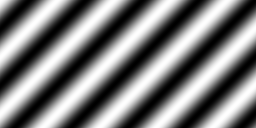

In [2]:
H = 128
W = 256
s = (H,W)
T = 40
theta = 45 * np.pi/180
f = ia.cos(s, T, theta, 0)
ia.adshow(ia.normalize(f, [0,255]))

**OBS: estou usando a função adshow no lugar da implot pois percebi um efeito quadriculado na visualização (vejam abaixo).**

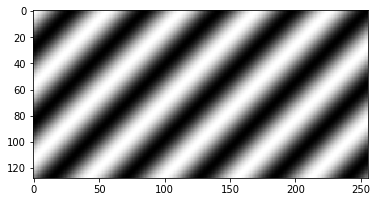

In [3]:
plt.imshow(f, cmap='gray')

## Solução

Podemos começar variando a direção da onda. Fazemos isso, alterando o valor do ângulo theta. Repare que para theta igual a 0 e theta igual a $\frac{\pi}{2}$, $T_r$ e $T_c$ não estão definidos, pois $\sin{0}$ e $\cos{\frac{\pi}{2}}$ resultam no valor nulo. Além disso, repare também que apenas $\sin{0}$ é um problema, pois como estamos trabalhando com valores finitos $\cos{\frac{\pi}{2}}$ nunca resultará em $0$ de fato. Essos dois ângulos representam as direções horizontal e vertical, respectivamente.

""
""

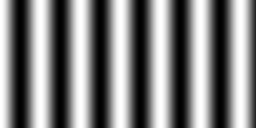

In [4]:
theta = 0
warnings.filterwarnings('ignore') # just ignore warning due forbidden division
f = ia.cos(s, T, theta, 0)
warnings.filterwarnings('default') # get back to normal
ia.adshow(ia.normalize(f, [0,255]))

""
""

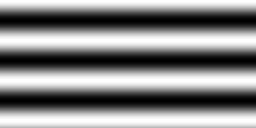

In [5]:
theta = np.pi/2
f = ia.cos(s, T, theta, 0)
ia.adshow(ia.normalize(f, [0,255]))

Agora podemos fixar um ângulo e variar $T$, que corresponde ao nosso comprimento de onda. Assim, variando este valor esperamos observar faixas de diferente espessuras e que quanto maior for o valor $T$ mais espessas serão as faixas observadas. Logo, percebemos que para valores próximos de 0, iremos observar uma imagem acinzentada, já que as faixas serão tão finas que não seremos mais capazes de enxergá-las.

In [6]:
theta = 0

""
""

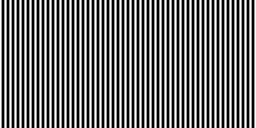

In [7]:
T = 5
warnings.filterwarnings('ignore') # just ignore warning due forbidden division
f = ia.cos(s, T, theta, 0)
warnings.filterwarnings('default') # get back to normal
ia.adshow(ia.normalize(f, [0,255]))

""
""

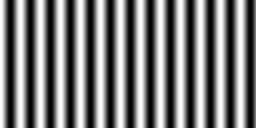

In [8]:
T = 20
warnings.filterwarnings('ignore') # just ignore warning due forbidden division
f = ia.cos(s, T, theta, 0)
warnings.filterwarnings('default') # get back to normal
ia.adshow(ia.normalize(f, [0,255]))

""
""

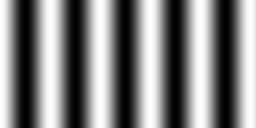

In [9]:
T = 50
warnings.filterwarnings('ignore') # just ignore warning due forbidden division
f = ia.cos(s, T, theta, 0)
warnings.filterwarnings('default') # get back to normal
ia.adshow(ia.normalize(f, [0,255]))

### Parte 2 - Calculando a translação periódica

A próxima atividade consiste em entender as diferentes implementações da translação periódica. Procure comparar as 3 versões ([translação periódica](09 Translacao periodica.ipynb)). 

1. Primeiro, transforme a primeira implementação em uma função que recebe parâmetros para realizar a translação (rr, cc). 
2. Implemente a terceira forma indicada no link acima (usando slicing). 
3. Compare as 3 formas, em termos de resultado e de tempo. É provável que a última opção seja a mais eficiente de todas, pois somente utiliza fatiamento.

Um dos cuidados nas implementações é observar que os parâmetros da translação podem ser negativos ou ainda bem maiores que a largura ou altura da imagem.



## Solução

2.1

In [10]:
def ptrans_rep(f, t):
    H,W = f.shape
    dh,dw = t
    dhi = (-dh + H) % H # mapeamento inverso igual feito em iaffine (inversa de T)
    dwi = (-dw + W) % W # mapeamento inverso
    f2 = np.vstack((f,f))
    f4 = np.hstack((f2,f2))
    g = f4[dhi:dhi+H,dwi:dwi+W]
    return g

/home/guilherme/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:1054: ResourceWarning: unclosed file <_io.TextIOWrapper name='../data/cameraman.tif' mode='r' encoding='UTF-8'>
  return super(TiffImageFile, self).load()


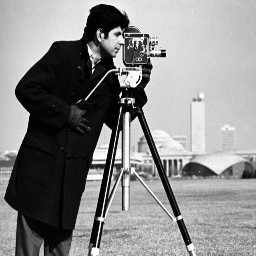

In [11]:
cameraman = Image.open('../data/cameraman.tif')
f = np.asarray(cameraman)
t = (-30,-80)
cameraman

Translação utilizando a replicação da imagem

required time: 0.0002 [s]


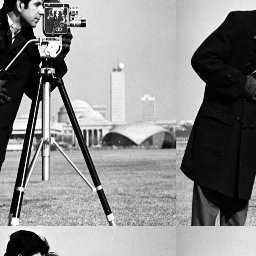

In [12]:
t0 = get_time(time.CLOCK_PROCESS_CPUTIME_ID)
g = ptrans_rep(f,t)
t1 = get_time(time.CLOCK_PROCESS_CPUTIME_ID) 
print('required time: %.4f [s]' %(t1 - t0))
Image.fromarray(g, mode="L")

Translação utilizando o método de indexação.

required time: 0.0082 [s]


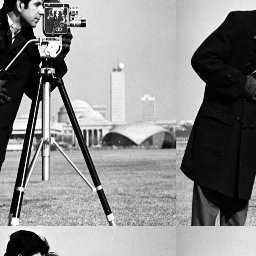

In [13]:
t0 = get_time(time.CLOCK_PROCESS_CPUTIME_ID)
g1 = ia.ptrans(f,t)
t1 = get_time(time.CLOCK_PROCESS_CPUTIME_ID) 
print('required time: %.4f [s]' %(t1 - t0))
Image.fromarray(g1, mode="L")

A funcao ia.ptrans2d translada a imagem utilizando o método do fatiamento, portanto, não precisamos reimplementá-la. Esta função usa a propriedade de simetria de retângulos, bastando apenas calcular o tamanho de cada retângulo interno e reposicioná-los adequadamente para obter a translação resultante.

required time: 0.0002 [s]


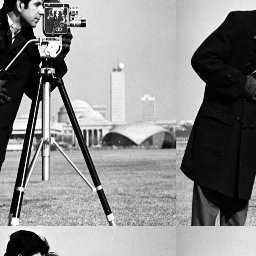

In [14]:
t0 = get_time(time.CLOCK_PROCESS_CPUTIME_ID)
g2 = ia.ptrans2d(f,t)
t1 = get_time(time.CLOCK_PROCESS_CPUTIME_ID)
print('required time: %.4f [s]' %(t1 - t0))
Image.fromarray(g2, mode="L")

Podemos verificar se as implementações retornam as mesma matrizes e confirmar que em termos de resultado elas são idênticas.

In [15]:
g2.all() == g1.all() == g.all()

True

Além disso, podemos também compará-las em termos do tempo e estimar quais dos métodos são o mais lento e o mais rápido para realizar a tarefa, já que em termos de resultado eles são idênticos. Executando diversas vezes os 3 métodos discutidos, observamos que o método do fatiamento e o método de indexação são o mais rápido e o mais lento, respectivamente, em média. Além disso, observamos também que a implementação utilizando a replicação possui um desempenho bastante similar ao fatiamento. É claro que a comparação feita aqui não possui nenhuma abordagem científica, mas ela nos traz uma dica para o que de fato acontece no ambiente real.

### Parte 3 - Calculando a Transformada de Fourier de uma onda senoidal

Antes de continuar, leia sobre a Transformada Discreta de Fourier (DFT) e sobre a Transformada Rápida de Fourier (FFT). Além dos slides colocados no Google Calssroom, dê uma olhada em alguns links interessantes:

- [demo](http://bigwww.epfl.ch/demo/ip/demos/FFT/)
- [explicação intuitiva](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

No exemplo abaixo, a partir da onda senoidal bidimensional gerada na parte 1, calculamos a Transformada de Fourier usando a função *fft2* do numpy. Para a visualização, é necessário fazer a translação periódica, para colocar a origem do espectro (0,0) no centro da imagem. Também é preciso usar o valor da magnitude do espectro resultante, já que o resultado da transformação é uma matriz complexa. E por fim, costumamos visualizar o log do resultado.

""
""

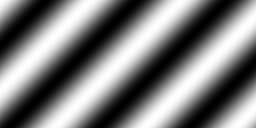

In [16]:
H = 128
W = 256
s = (H,W)
T = 64
theta = np.pi/4
f = ia.cos(s, T, theta, 0)
ia.adshow(ia.normalize(f))

""
"[0, 255]"

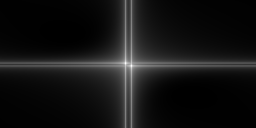

In [17]:
F = fft2(f)
H,W = f.shape
ia.adshow(ia.normalize(np.log(np.abs(ia.ptrans(F,(H//2,W//2))+1))), [0,255])

1. Experimente visualizar a Transformada de Fourier de diversas formas: sem fazer a translação periódica, sem calcular o logaritmo. Observe as diferenças e comente.
2. Crie uma função auxiliar de visualização da Transformada de Fourier, assim como fizeram para visualização de múltiplas imagens, pois ela será bastante utilizada neste e nos próximos notebooks.
3. Explique porque o espectro de Fourier não aparece como apenas 2 pontos (senoide). Modifique a senoide *f* para obter apenas 2 pontos na Transformada de Fourier. (DICA: a imagem *f* que estamos buscando ainda será uma senoide bidimensional, porém com alguma propriedade que evite o efeito observado.) Uma outra maneira de tentar entender o que está causando o problema é criar o espectro que se deseja de forma sintética (uma imagem com 2 pontos equidistantes do centro e diametralmente opostos - dizemos que é um par de pontos complexos conjugados) e fazer a transformada inversa de Fourier (ifft2 do numpy) para obter a imagem da senoide buscada.

## Solução

3.2

# Function fourier_spec

## Synopse

This function returns the Fourier Spectrum of a Fourier Transform.

- **g = fourier_spec(ft, t)**

    - **g**:output: fourier spectrum as ndarray.
    - **ft**:input: Fourier transform of an image as ndarray.
    - **t**:input: periodic translation of ft as a tuple like (rows,columns).

In [18]:
def fourier_spec(ft, t):
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    H, W = t
    return ia.normalize(np.log(np.abs(ia.ptrans2d(ft,(H//2,W//2))+1)))

3.1 

""
""

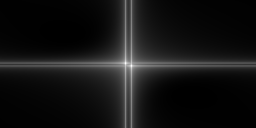

In [19]:
ia.adshow(fourier_spec(F, F.shape))

Quando não calculamos o logaritmo do espectro da imagem não obtemos o detalhamento desejado dele. Aplicar o logaritmo ao espectro faz com que haja um espalhamento controlado dos valores de modo que valores distintos não sejam aproximados para os mesmos valores na discretização feita na amostragem do espectro. Assim, para a imagem sintética do seno, iremos observar apenas dois pontos em destaque.

""
"[0, 255]"

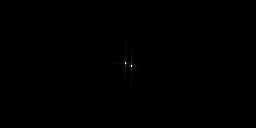

In [20]:
faux = ia.normalize(np.abs(ia.ptrans(F,(H//2,W//2))+1))
ia.adshow(faux, [0,255])

Não aplicar a translação periódica ao espectro de fourier significa que teremos o ponto de menor frequência exatamente na posição $(0,0)$, isto é, a posição onde é computado o valor médio da imagem que no caso do seno é o valor $0$. 

""
"[0, 255]"

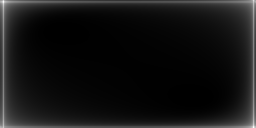

In [21]:
ia.adshow(fourier_spec(F, (0,0)), [0,255])

3.3

Primeiro construimos o nosso espectro desejado. Como dito no enunciado, queremos um espectro tal que obtenhamos apenas 2 pontos na Transformada de Fourier. Podemos utilizar como base o resultado obtido quando não calculamos o logaritmo da transformada, ja que neste caso os traçados são quase que imperceptíveis, assim, necessitamos apenas de um valor de threashold para garantir que apenas dois pontos serão obtido. O valor de threashold escolhido foi arbitrário, sendo necessário apenas observar o espectro utilizado como base.

In [22]:
ft = ia.normalize(np.abs(ia.ptrans(F,(0,0))))
ft[ft < 100] = 0

Agora, basta calcular a inversa da transformada e tomar apenas a parte real do resultado, que é o que nos interessa.

""
"[0, 255]"

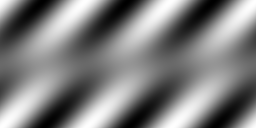

In [23]:
new_f = ifft2(ft)
ia.adshow(ia.normalize(np.real(new_f)), [0,255])

Como podemos observar, obtemos uma imagem um tanto estranha. Para que não tenhamos dúvida do que acabamos de fazer podemos verficar se para o espectro dessa imagem obtemos apenas dois pontos equidistantes como queriamos.

""
"[0, 255]"

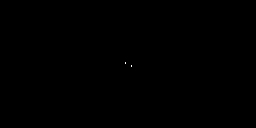

In [24]:
new_F = fft2(new_f)
ia.adshow(fourier_spec(new_F, (H,W)), [0,255])

Assim, chegamos a conclusão que realmente o procedimento que realizamos nos leva ao resultado pretendido.